In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

In [6]:
url='https://drive.google.com/file/d/1BHxWh-yxw0oETNQaWELIx_LSQ1mHup6f/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243185 entries, 0 to 243184
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   like_count          243185 non-null  int64 
 1   source              243185 non-null  object
 2   total_media_shared  243185 non-null  int64 
 3   retweet_count       243185 non-null  int64 
 4   year                243185 non-null  int64 
 5   month_name          243185 non-null  object
 6   month_day           243185 non-null  int64 
 7   full_date           243185 non-null  object
 8   time                243185 non-null  object
 9   cleaned_tweet       243185 non-null  object
 10  sentiment           243185 non-null  object
 11  country             243185 non-null  object
dtypes: int64(5), object(7)
memory usage: 22.3+ MB


In [8]:
df.head(10)

,like_count,source,total_media_shared,retweet_count,year,month_name,month_day,full_date,time,cleaned_tweet,sentiment,country
0,15,Twitter Web App,0,4,2020,January,1,2020-01-01,19:51:05,1/ *NEW PAPERS ALERT* Very proud to share the...,Positive,United States
1,1,Social Media Management Platform,0,0,2020,January,2,2020-01-02,15:00:00,"Drawing from actual events, #Event201 identifi...",Positive,United States
2,3,Social Media Management Platform,0,1,2020,January,5,2020-01-05,22:46:12,Interesting article @user on whether the Justi...,Positive,unknown
3,1,Twitter Web App,0,0,2020,January,5,2020-01-05,19:05:20,@user @user But batteries of tests have been p...,Neutral,United States
4,3,Twitter for Android,0,0,2020,January,6,2020-01-06,15:32:57,#Pandemic players: what do you do if you draw ...,Negative,United States
5,1,Social Media Management Platform,1,0,2020,January,7,2020-01-07,19:05:05,Preparing for the Next #Pandemic — The @user’s...,Neutral,United States
6,21,Social Media Management Platform,0,13,2020,January,7,2020-01-07,14:38:19,It’s not known whether a #SARS-like http” has...,Neutral,República Dominicana
7,2,Social Media Management Platform,0,3,2020,January,8,2020-01-08,23:55:29,Concern that a novel http has caused the #wuha...,Negative,Australia
8,8,Twitter Web App,0,3,2020,January,8,2020-01-08,17:32:46,Given that both #Wuhan and #HongKong's http to...,Neutral,United States
9,5,Twitter Web App,0,1,2020,January,8,2020-01-08,17:29:40,Authorities in #HongKong are now reporting 9 p...,Negative,United States


# Exploratory Data Analysis (EDA)

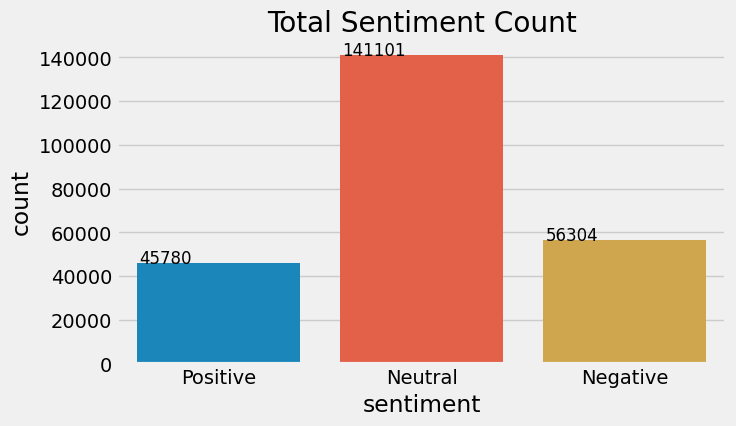

In [9]:
f, ax = plt.subplots(figsize=(7,4))
sns.countplot(data=df, x='sentiment')
plt.title("Total Sentiment Count")

for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+0.01, p.get_height()+25), fontsize = 12)

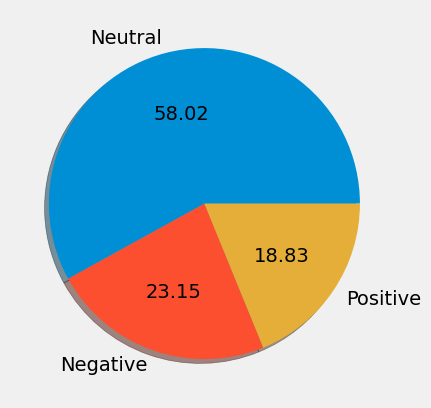

In [10]:
plt.pie(df['sentiment'].value_counts(), labels= df['sentiment'].value_counts().reset_index()['index'],
            shadow=True, autopct='%0.2f')
plt.show()

### Inference:

1. During the **covid-19**, the most tweet were **Neutral** (58%) followed by **Negative** (23.15%) and then **positive** (18.83%). 

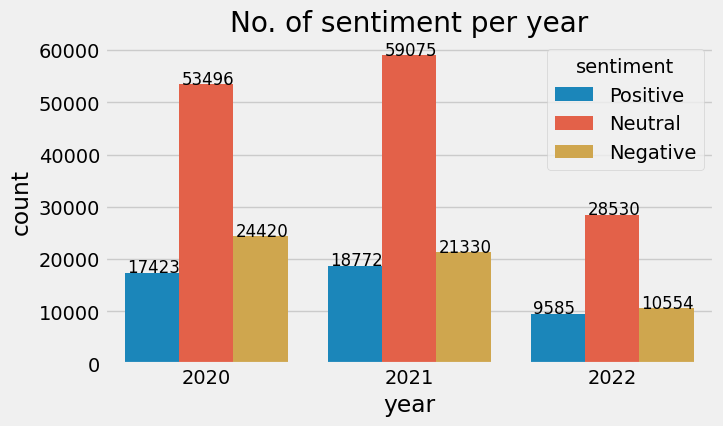

In [11]:
f, ax = plt.subplots(figsize=(7,4))
sns.countplot(data=df, x='year', hue='sentiment')
ax.set_title("No. of sentiment per year")
# f.show()
for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+0.01, p.get_height()+25), fontsize = 12) 

### Inference:

1. Every year, the number of **Neutral** sentiment is highest followed by **Negative** and **Positive**.

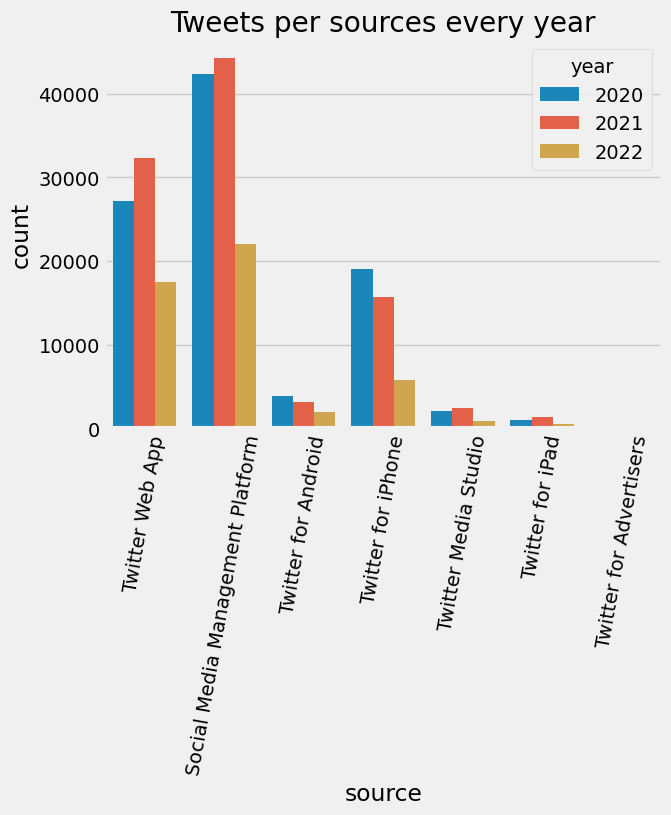

In [12]:
sns.countplot(x='source', data=df, hue='year')
plt.xticks(rotation=80)
plt.title("Tweets per sources every year")
plt.show()

### Inference:

> We can infer that most of the tweets are made by **Social Media Management Platform**, followed by **Twitter Web App**, **Iphone**, **Android**, **Twitter Media Studio**, **Twitter Media Studio** and **Advertisers**

In [13]:
# calculating average like, retweet and total media shared 
np.average(df['like_count']), np.average(df.retweet_count), np.average(df.total_media_shared)

(51.89338569401896, 16.829927832719946, 0.4856302814729527)

The average **like count** is *51.89*, **retweet count** is *16.82* and **total media shared** is *0.48*. (for all covid related post). 

In [14]:
grouped = df.groupby('country').sum().reset_index()
grouped = grouped.sort_values(by='like_count', ascending=False)
grouped = grouped.head(6)
grouped

C:\Users\Acer\AppData\Local\Temp\ipykernel_15236\2139719615.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('country').sum().reset_index()


,country,like_count,total_media_shared,retweet_count,year,month_day
143,United States,6887104,53685,2322419,225775360,1756688
153,unknown,1906298,12338,558137,56938496,446958
23,Canada,1175356,11524,320796,54105035,422110
142,United Kingdom,461822,3308,146393,13457071,106461
53,India,422920,6917,112545,28365211,224144
127,Switzerland,381730,1379,176622,4745578,39131


C:\Users\Acer\AppData\Local\Temp\ipykernel_15236\243196507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('country').sum().reset_index()


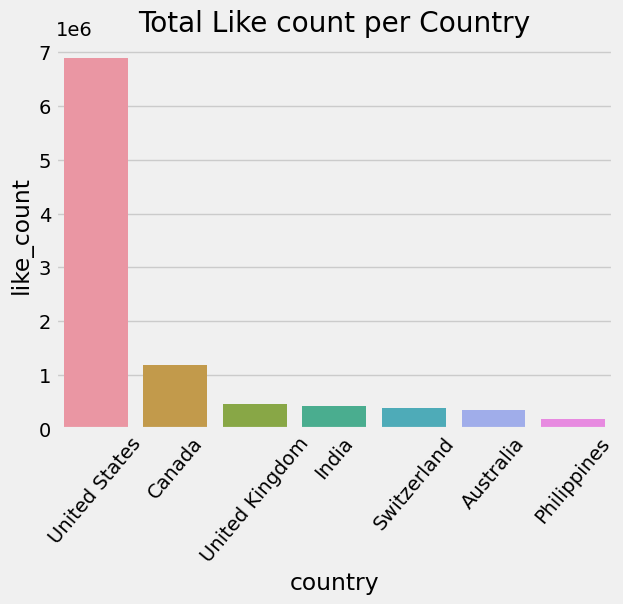

In [15]:
df_grouped = df.groupby('country').sum().reset_index()

df_grouped.sort_values(by='like_count', ascending=False, inplace=True)

#top 5 countries with the highest sum of likes
df_top_5 = df_grouped.head(8)
df_top_6  = df_top_5[df_top_5['country'] != 'unknown'] 

# Plot the top 5 countries using Seaborn
sns.barplot(x='country', y='like_count', data=df_top_6)

plt.title("Total Like count per Country")
plt.xticks(rotation=50)
plt.show()

### Inference: 

1. The country with *highest total like count* for this data in twitter is **United States** with nearly  **~7 * 10^6**, which is greater than all other 6 country combined. 

2. The country with second highest total like country in twitter is **Canada**, followed by **United Kingdom**, **India**, **Switzerland**, **Australia** and  **Phillippines** 

In [16]:
grouped_df = df.groupby(['sentiment', 'country']).size().reset_index(name='count')
grouped_df

,sentiment,country,count
0,Negative,Africa,51
1,Negative,Andorra,1
2,Negative,Argentina,62
3,Negative,Asia,6
4,Negative,Australia,3343
...,...,...,...
428,Positive,اليمن,3
429,Positive,عمان,2
430,Positive,नेपाल,2
431,Positive,ປະເທດລາວ,8


In [20]:
pivot_df = grouped_df.pivot(index='country', columns='sentiment', values='count')
# fill any missing values with 0
pivot_df.fillna(0, inplace=True)
pivot_df.sort_values(by=['Negative', "Neutral", "Positive"], ascending=False, inplace=True)
pivot_df['total'] = pivot_df.Negative + pivot_df.Neutral + pivot_df.Positive
pivot_df

sentiment,Negative,Neutral,Positive,total
country,,,,
United States,24941.0,63276.0,23510.0,111727.0
unknown,7497.0,14772.0,5908.0,28177.0
Canada,5219.0,16397.0,5157.0,26773.0
Australia,3343.0,7359.0,1625.0,12327.0
India,2921.0,9618.0,1495.0,14034.0
...,...,...,...,...
Hrvatska,0.0,0.0,1.0,1.0
Micronesia,0.0,0.0,1.0,1.0
Niger,0.0,0.0,1.0,1.0


In [21]:
top_7 = pivot_df.head(8).query('country != "unknown"')
top_7

sentiment,Negative,Neutral,Positive,total
country,,,,
United States,24941.0,63276.0,23510.0,111727.0
Canada,5219.0,16397.0,5157.0,26773.0
Australia,3343.0,7359.0,1625.0,12327.0
India,2921.0,9618.0,1495.0,14034.0
United Kingdom,1804.0,3497.0,1358.0,6659.0
Philippines,1192.0,3914.0,516.0,5622.0
Kenya,1102.0,4090.0,1485.0,6677.0


### Inference: 

1. The country with *highest total tweet* for this data in twitter is **United States** with nearly  **112K**, which is then followed by **Canada** with **27K** and **Australia** with **12K**.


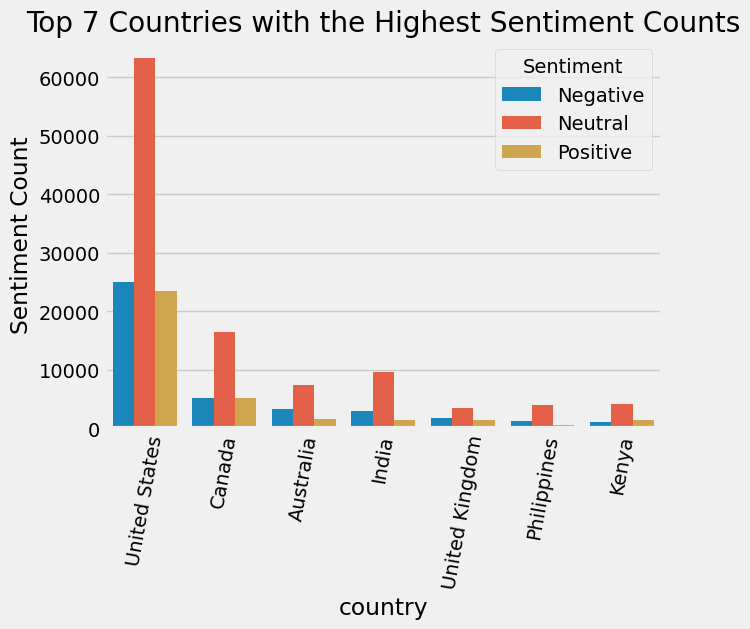

In [22]:
df2 = top_7.sort_values(by=['Negative', 'Neutral', 'Positive'], ascending=False)
df2 = df2.head(7).reset_index()

# reshape the data into a format that seaborn can use
df2 = df2.melt(id_vars='country', value_vars=['Negative', 'Neutral', 'Positive'], 
             value_name='Sentiment Count', var_name='Sentiment')

# # create a countplot with seaborn
sns.barplot(x='country', y='Sentiment Count', hue='Sentiment', data=df2)

# add the title and rotate the x-tick labels for better visibility
plt.title('Top 7 Countries with the Highest Sentiment Counts')
plt.xticks(rotation=80)

# show the plot
plt.show()

### Inference

1. **United States** tweeted the most tweets with **Positive**, **Neutral** and **Negative** sentiment which combined is more than 100,000 tweets which is nearly half the tweet here. 

2. The country with second highest sentiment counts in twitter is **Canada**, followed by **Australia**, **India**, **United Kingdom**, **Philippines** and  **Kenya** 

C:\Users\Acer\AppData\Local\Temp\ipykernel_15236\2456685593.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('source').sum().reset_index()


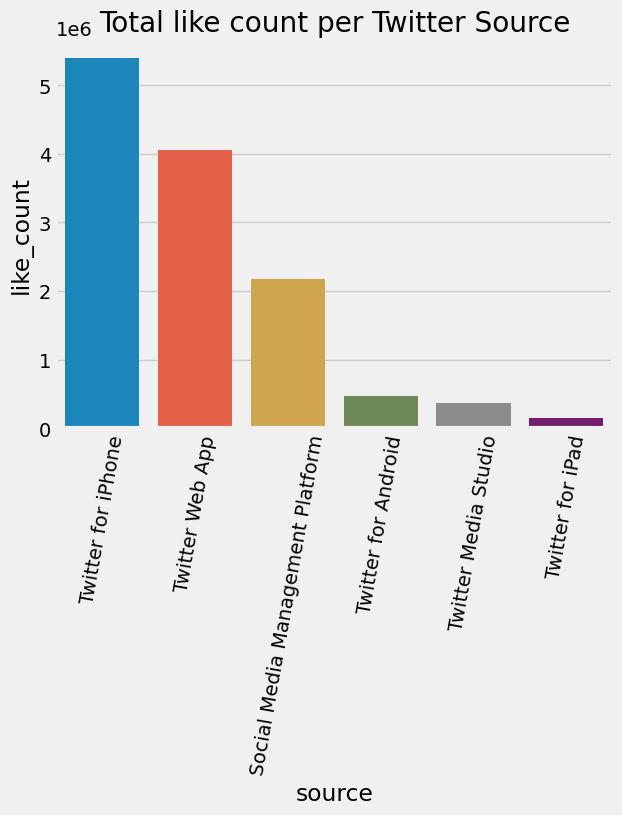

In [23]:
df_grouped = df.groupby('source').sum().reset_index()

df_grouped.sort_values(by='like_count', ascending=False, inplace=True)

#top 5 countries with the highest sum of likes
df_top_5 = df_grouped.head(6)

sns.barplot(data=df_top_5, x='source', y='like_count')
plt.title('Total like count per Twitter Source')
plt.xticks(rotation=80)
plt.show()

### Inference


1. Most of the twitter sources use **Iphone** to post, which means most of the verified individuals who tweeted uses Iphones and the like count being **~5.2 * 10^6**
2. The **Second** most liked source to post is **Twitter Web Apps** which has liked count of **~4*10^6** which is then followed by **Social Media Management Platform** with **2.2* 10^6**.

<AxesSubplot: xlabel='total_media_shared', ylabel='like_count'>

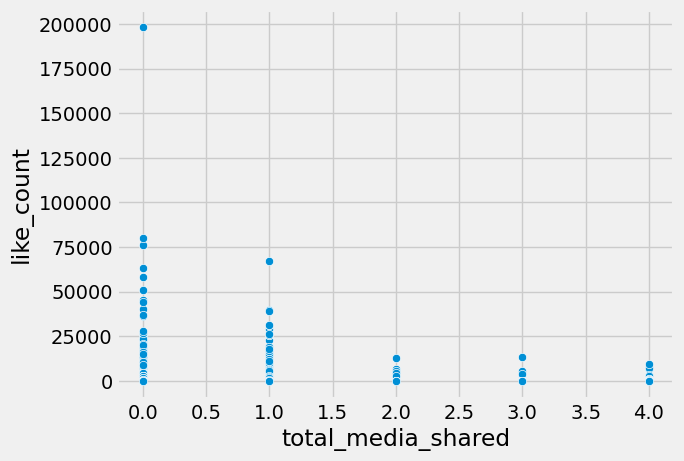

In [25]:
sns.scatterplot(data=df, x='total_media_shared', y='like_count')

### Inference


1. The **Like Count** and **Total Media Shared** are *Inversely related* to each other, meaning the more media (i.e., photos, videos, etc.) they shared, the less like they get.